# Decision Tree Algorithm

Classification is a process of diving a data set into different cat of groups by adding labels.

Generally, the process goes as, taking the data, analyzing it and based on some conditions the data set is divided into various categories. 

So, why is classification needed? It is necessary to perform prediction analytics on the data for better organization and access.  For instance, Gmail recognizes an incoming email and categorizes as spam, social, promotions or into general inbox.

**Types of Classification**

There are several types of classifications which are currently used based on the need. Listed here are few among them.

- Decision Tree
- Random Forest
- Naive Bayes
- KNN

### Decision Tree

Decision tree is a graphical representation of all possible solutions to a decision, where decision outcomes are based on some conditions.

Dcision tree enables easy understanding of the path from problem statement to solution.

For example,
Task - Should i accept a new job offer?
Base condition is depicted by a root node, and branches to conditions and ends with leaves as solution and hence called decision tree.

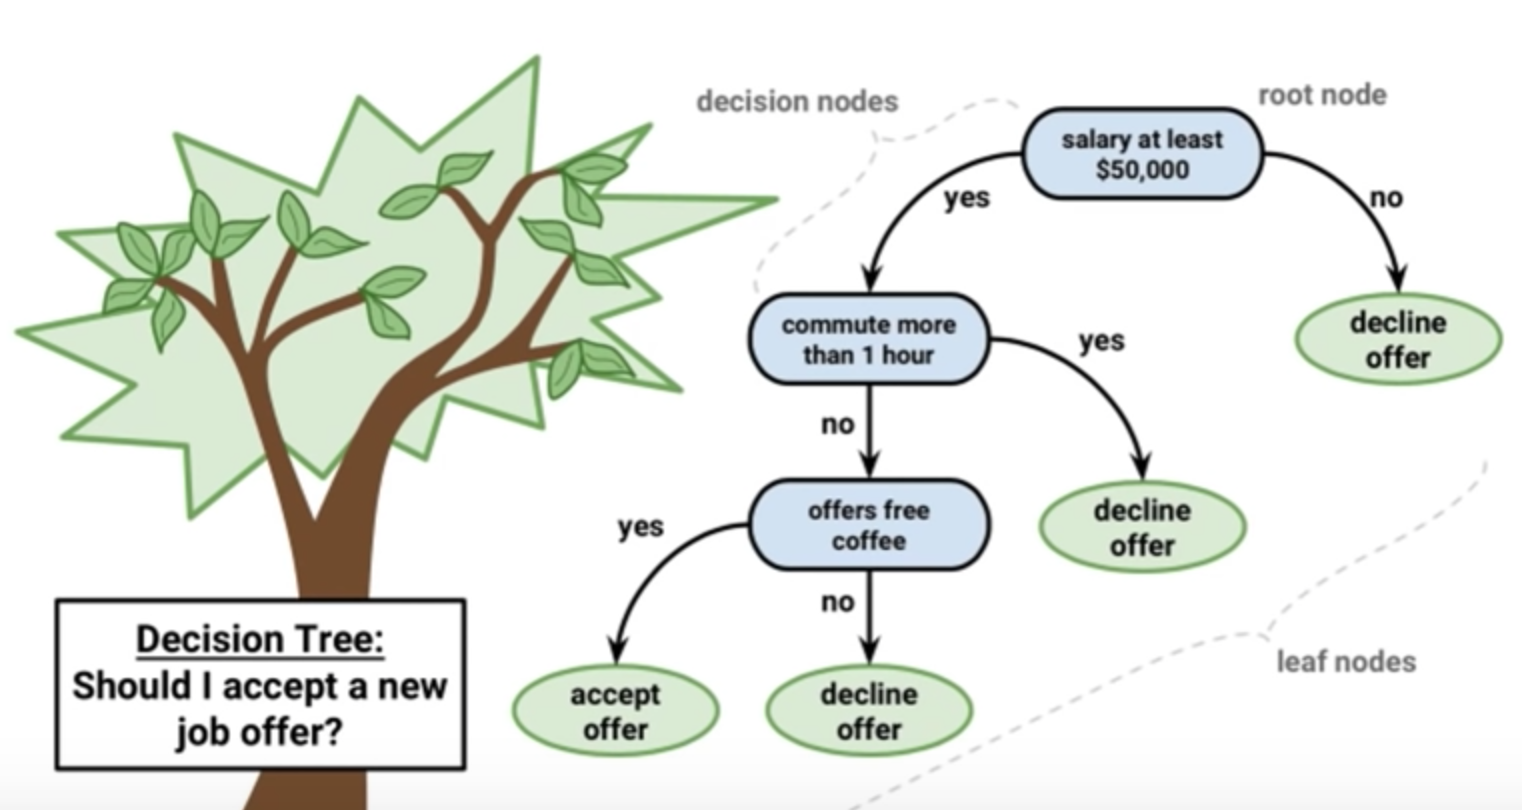

In [30]:
from IPython.display import Image
Image(filename='images/7.png', width=400, height=400)

### Decision Tree Terminology

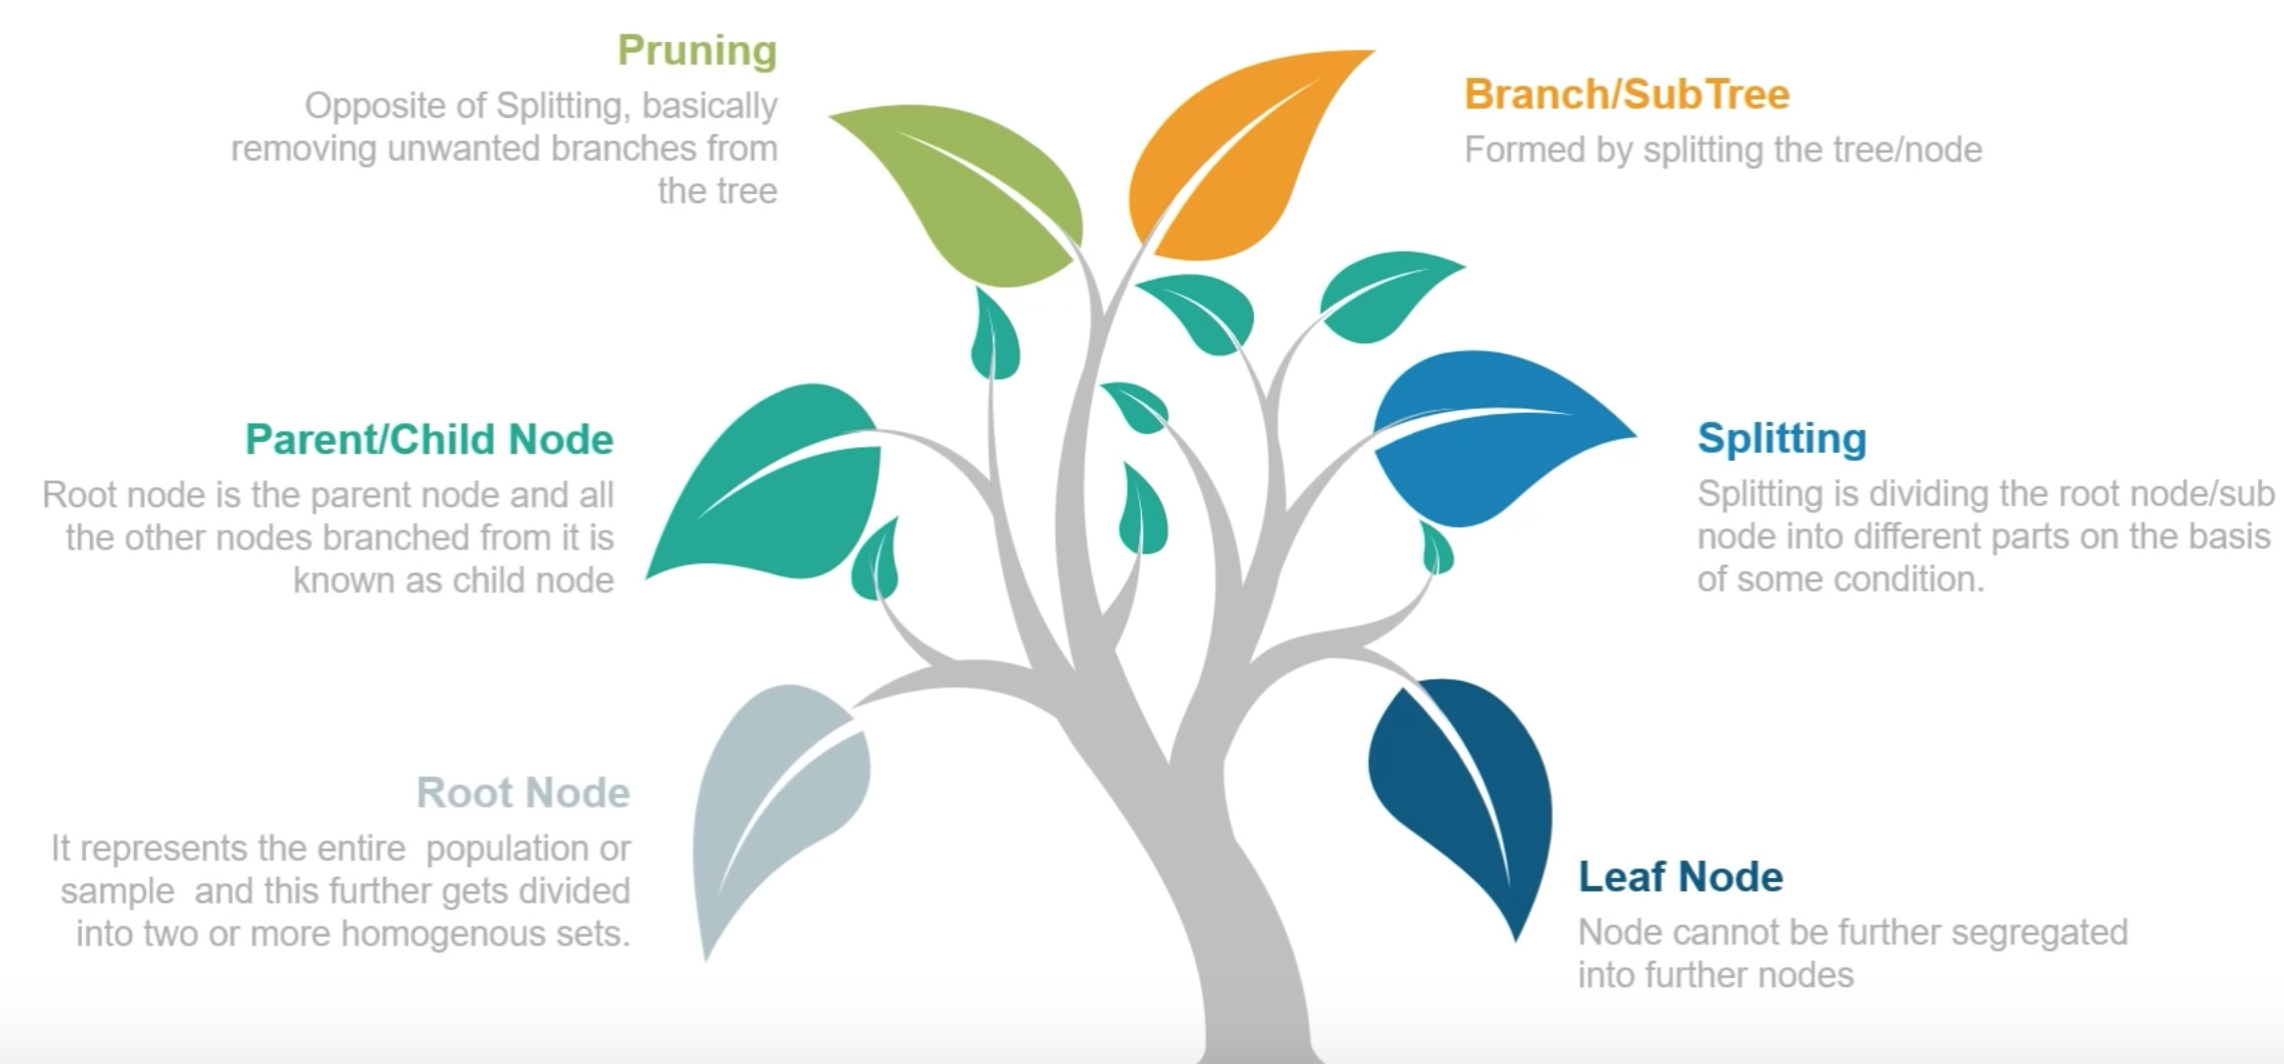

In [32]:
from IPython.display import Image
Image(filename='images/8.png', width=600, height=600)

## Implementation

In [1]:
# import required packages and libraries
import numpy as np
import pandas as pd
from __future__ import division

In [2]:
def gini_index(groups, classes):
    '''
    Compute the gini index of both the groups
    '''
    n = float(sum([len(group) for group in groups]))
    gini = 0
    for group in groups:
        if len(group)!=0:
            score = 0
            for cls in classes:
                proportion = len([g[-1] for g in group if g[-1] == cls])/(len(group))
                score += proportion * proportion
            gini += (1 - score) * len(group)/n
    return gini

In [3]:
print(gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0


In [4]:
def get_best_split(data):
    '''
    For each column, split into 2 groups for each value and compute gini index. The split with the least Gini Index is the best one
    '''
    classes = list(set([d[-1] for d in data]))
    gini,split_col,split_val,groups = 999, 999, 999, None
    for col in range(len(data[0])-1):
        for row in (data):
            left = [l for l in data if l[col] < row[col]]
            right = [l for l in data if l[col] >= row[col]]
            gini_split = gini_index([left, right], classes)
            if gini_split < gini:
                gini = gini_split
                split_col = col
                split_val = row[col]
                groups = [left,right]
    return {'index':split_col, 'value':split_val, 'groups':groups}

In [5]:
def leaf(group):
    '''
    Return the target and number of samples corresponding to a leaf
    '''
    target = [row[-1] for row in group]
    return max(set(target), key=target.count)

### Check for terminating conditions and grow the tree

Here, we specify terminating conditions on which we stop further splitting and return target and number of samples. The terminating conditions are:

- There is no left or right tree
- Max depth has been reached
- Minimum number of samples in a leaf has been reached

If none is true, we continue splitting using the get_best_split() function

In [6]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = leaf(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = leaf(left), leaf(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = leaf(left)
    else:
        node['left'] = get_best_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = leaf(right)
    else:
        node['right'] = get_best_split(right)
        split(node['right'], max_depth, min_size, depth+1)

In [7]:
# Initiate the decision tree recursion

# Build a decision tree
def build_tree(train, max_depth, min_size):
    '''
    Initiate tree building
    '''
    root = get_best_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [8]:
# Predict target for the test data

def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [9]:
# Printing the splitting conditions as a way of interpreting the model

def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [10]:
def predictions(tree, test_data):
    accuracy = 0
    for row in test_data:
        prediction = predict(tree, row)
        if row[-1] == prediction:
            accuracy += 1
    accuracy = accuracy/float(len(test_data))
    print(accuracy)

**Run the algorithm with a numeric data set**

In [11]:
dataset = [[2.771244718,1.784783929,0],
    [1.728571309,1.169761413,0],
    [3.678319846,2.81281357,0],
    [3.961043357,2.61995032,0],
    [2.999208922,2.209014212,0],
    [7.497545867,3.162953546,1],
    [9.00220326,3.339047188,1],
    [7.444542326,0.476683375,1],
    [10.12493903,3.234550982,1],
    [6.642287351,3.319983761,1]]

tree = build_tree(dataset, 1, 1)

# print the splitting conditions
print_tree(tree)

[X1 < 6.642]
 [0]
 [1]


In [14]:
test_data = [[2.771244718,1.784783929,1],
    [1.728571309,1.169761413,0],
    [3.678319846,2.81281357,0]]

In [17]:
# To calculate the predictions of actual to test data set

predictions(tree, test_data)

0.666666666667


**Run the algorithm with a non-numeric data set**

In [25]:
data_set = [
    ['Green', 3, 'Mango'],
    ['Yellow', 3, 'Mango'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon']]

tree = build_tree(data_set, 1, 1)
print_tree(tree)

[X2 < 3.000]
 [Grape]
 [Mango]


In [26]:
testing_data = [
        ['Green', 3, 'Mango'],
        ['Yellow', 4, 'Apple'],
        ['Red', 2, 'Grape'],
        ['Red', 1, 'Grape'],
        ['Yellow', 3, 'Lemon']]

In [27]:
predictions(tree, testing_data)

0.6


**Run the algorithm with a large data set by loading text file**

In [28]:
data = pd.read_csv('data_banknote_authentication.txt', header = None, names = ['c1', 'c2', 'c3', 'c4', 'target'])
data.head()

,c1,c2,c3,c4,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
classes = data.target.unique()
classes

array([0, 1])

In [21]:
data.shape

(1372, 5)

In [22]:
train, test = data.iloc[0:1200,:], data.iloc[1200:,:]

In [23]:
train.shape, test.shape

((1200, 5), (172, 5))

In [24]:
tree = build_tree(train.values, 3, 5)
print_tree(tree)
predictions(tree, test.values)

[X1 < -0.278]
 [X2 < 9.399]
  [X2 < 7.327]
   [1.0]
   [1.0]
  [X1 < -1.577]
   [0.0]
   [0.0]
 [X3 < -4.384]
  [X1 < 4.216]
   [1.0]
   [0.0]
  [X1 < 1.065]
   [0.0]
   [0.0]
0.848837209302


**References:**

https://www.youtube.com/watch?v=qDcl-FRnwSU

https://github.com/neerjad/MachineLearning/blob/master/03-decision_tree_from_scratch.ipynb
